
**Spatial Regression**

In this notebook I have included a spatial regression for partisan legislative polarization relative to a variety of factors using datasets of US congression voting and population characteristics.

In [ ]:
!apt install python3-rtree
!pip install pysal #Python Spatial Analysis Library
!pip install geopandas
!pip install mapclassify
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install geoplot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 11 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

In [ ]:
import pysal
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
import mapclassify
import geoplot as gplt
import geoplot.crs as gcrs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
with ZipFile('/content/gdrive/MyDrive/Colab Notebooks/GIS/Cumulative.zip') as myzip:
    myzip.printdir()

File Name                                             Modified             Size
Cumulative/                                    2022-11-27 16:45:12            0
Cumulative/US_House_Elections_Demo_NAD83.prj   2022-11-27 16:45:12          167
Cumulative/.DS_Store                           2022-11-23 17:37:18         6148
__MACOSX/Cumulative/._.DS_Store                2022-11-23 17:37:18          120
Cumulative/US_House_Elections_Demo_NAD83.gal   2022-11-23 17:51:42        35521
Cumulative/US_House_Elections_Demo_NAD83.cpg   2022-11-27 16:45:12            5
Cumulative/US_House_Elections_Demo_NAD83.shp   2022-11-27 16:45:20     84272148
Cumulative/US_House_Elections_Demo_NAD83.qmd   2022-11-27 16:45:20         1045
Cumulative/US_House_Elections_Demo_NAD83.shx   2022-11-27 16:45:20         3556
Cumulative/US_House_Elections_Demo_NAD83.dbf   2022-11-27 16:45:20      1370690


In [ ]:
with ZipFile('/content/gdrive/MyDrive/Colab Notebooks/GIS/Cumulative.zip') as myzip:
    myzip.extractall(".")

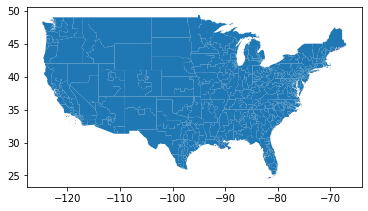

In [ ]:
#Read in elections dataset merged shapefile file
df = gpd.read_file("Cumulative/US_House_Elections_Demo_NAD83.shp")
df.plot();

In [ ]:
df.head()

In [ ]:
my_list = df.columns.values.tolist()
my_list

# **Globalized Trend**

As a next step, look to see if globally, the same result is mirrored. Could convert dw nominate scores to all positive values using absolute value, which would indicate deviance from moderate norm (value of 0). Ideological extremity, regardless of party

In [ ]:
# Creating new variable containing abs value of nominate_dim1 scores, a new value for ideological extremity regardless of party

df['nominate_d_abs'] = abs(df['nominate_d'])
df.head(50)

,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,...,nokken_p_1,year,state,candidate,party,candidatev,totalvotes,Vote_share,geometry,nominate_d_abs
0,Louisiana,022113114006,6,113,114,None,None,None,None,None,...,-0.016,2018.0,LOUISIANA,GARRET GRAVES,REPUBLICAN,186553.0,268525.0,0.694732,"MULTIPOLYGON (((-91.82288 30.85806, -91.82264 ...",0.444
1,Maine,023113114001,1,113,114,None,None,None,None,None,...,-0.328,2018.0,MAINE,CHELLIE PINGREE,DEMOCRAT,201195.0,342053.0,0.588198,"MULTIPOLYGON (((-70.98905 43.79215, -70.98849 ...",0.420
2,Maine,023113114002,2,113,114,None,None,None,None,None,...,0.367,2018.0,MAINE,JARED F GOLDEN,DEMOCRAT,139231.0,281371.0,0.494831,"MULTIPOLYGON (((-71.08216 45.30631, -71.08169 ...",0.114
3,Maryland,024113114001,1,113,114,None,None,None,None,None,...,-0.398,2018.0,MARYLAND,ANDY HARRIS,REPUBLICAN,183662.0,306132.0,0.599944,"MULTIPOLYGON (((-77.31156 39.63875, -77.31154 ...",0.671
4,Maryland,024113114002,2,113,114,None,None,None,None,None,...,0.017,2018.0,MARYLAND,CA DUTCH RUPPERSBERGER,DEMOCRAT,167201.0,253302.0,0.660086,"MULTIPOLYGON (((-76.87630 39.14132, -76.87622 ...",0.295
5,Maryland,024113114003,3,113,114,None,None,None,None,None,...,-0.084,2018.0,MARYLAND,JOHN SARBANES,DEMOCRAT,202407.0,292880.0,0.691092,"MULTIPOLYGON (((-77.15622 39.26317, -77.15610 ...",0.467
6,Maryland,024113114004,4,113,114,None,None,None,None,None,...,-0.065,2018.0,MARYLAND,ANTHONY G BROWN,DEMOCRAT,209642.0,268583.0,0.780548,"MULTIPOLYGON (((-77.00816 38.81575, -77.00662 ...",0.344
7,Maryland,024113114005,5,113,114,None,None,None,None,None,...,0.155,2018.0,MARYLAND,STENY H HOYER,DEMOCRAT,213796.0,304209.0,0.702793,"MULTIPOLYGON (((-77.00880 38.74878, -77.00865 ...",0.380
8,Maryland,024113114006,6,113,114,None,None,None,None,None,...,-0.038,2018.0,MARYLAND,DAVID TRONE,DEMOCRAT,163346.0,276974.0,0.589752,"POLYGON ((-79.48755 39.28187, -79.48749 39.283...",0.279
9,Maryland,024113114007,7,113,114,None,None,None,None,None,...,-0.096,2018.0,MARYLAND,ELIJAH CUMMINGS,DEMOCRAT,202345.0,264710.0,0.764403,"MULTIPOLYGON (((-77.18711 39.34060, -77.18687 ...",0.438


In [ ]:
#Creating a Kernel Density weights Matrix for all districts
import libpysal
import esda
w = libpysal.weights.distance.KNN.from_dataframe(df, k=3)
mi = esda.Moran(df['nominate_d_abs'], w)
print(mi.I)
mi.p_sim

nan


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


0.001

In [ ]:
w.neighbors[2]

[1, 62, 63]

In [ ]:
#There was one row in the DF which had missing values - filled this with median
df['nominate_d_abs'].isnull().values.sum()
median1 = df['nominate_d_abs'].median()
df['nominate_d_abs'].fillna(median1, inplace=True)

median2 = df['Vote_share'].median()
df['Vote_share'].fillna(median2, inplace=True)

median3 = df['p.pop.fore'].median()
df['p.pop.fore'].fillna(median3, inplace=True)

median4 = df['poverty.ra'].median()
df['poverty.ra'].fillna(median4, inplace=True)

In [ ]:
df['poverty.ra'].isnull().values.sum()

0

In [ ]:
target='nominate_d_abs'
features=['Vote_share', 'p.pop.fore', 'poverty.ra']

Y_all = df[target].values.reshape(len(df),1) #add dimension for spreg OLS DV
X_all = df[features].values

In [ ]:
Y_all.shape,df[target].shape # see new dimensions of Y

((432, 1), (432,))

In [71]:
#Running spatial regression on all districts
import spreg

all_ols=spreg.OLS(Y_all, X_all, w=w, \
                          name_y="Ideological Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance",\
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests 
                          moran=True)  # compute Moran’s I on the residuals

print(all_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Ideological Polarization                Number of Observations:         432
Mean dependent var  :      0.4331                Number of Variables   :           4
S.D. dependent var  :      0.1459                Degrees of Freedom    :         428
R-squared           :      0.0728
Adjusted R-squared  :      0.0663
Sum squared residual:       8.510                F-statistic           :     11.1934
Sigma-square        :       0.020                Prob(F-statistic)     :   4.383e-07
S.E. of regression  :       0.141                Log likelihood        :     235.300
Sigma-square ML     :       0.020                Akaike info criterion :    -462.601
S.E of regression ML:      0.1404                Schwarz criterion     :    -446.327

--------------------------------------------------------------

In [63]:
#Running Spatial Lag Model
slag_all = spreg.ML_Lag(Y_all, X_all, w=w,  name_y="Ideological Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance")
print(slag_all.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Ideological Polarization                Number of Observations:         432
Mean dependent var  :      0.4331                Number of Variables   :           5
S.D. dependent var  :      0.1459                Degrees of Freedom    :         427
Pseudo R-squared    :      0.1145
Spatial Pseudo R-squared:  0.0682
Sigma-square ML     :       0.019                Log likelihood        :     242.434
S.E of regression   :       0.137                Akaike info criterion :    -474.867
                                                 Schwarz criterion     :    -454.525

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


# **Comparing Residuals (global)**

In [64]:
#Comparing Residuals
df['ols_u'] = all_ols.u
df['slag_u'] = slag_all.u

/usr/local/lib/python3.8/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


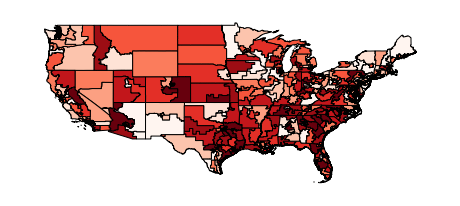

In [73]:
import mapclassify
import geoplot as gplt
import geoplot.crs as gcrs

ols_all_resids = mapclassify.Quantiles(df['ols_u'], k=10)

ax0 = gplt.choropleth(
    df, hue='ols_u',
    scheme=ols_all_resids, cmap='Reds');

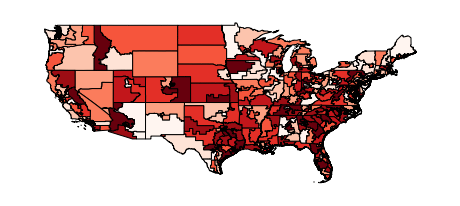

In [74]:
slag_all_resids = mapclassify.Quantiles(df['slag_u'], k=10)

ax0 = gplt.choropleth(
    df, hue='slag_u',
    scheme=slag_all_resids, cmap='Reds');

In [66]:
# Because it is difficult to see visually, comparing Moran's I statistic can be more clear 
import esda
esda.Moran(df['ols_u'], w).p_sim

0.001

In [67]:
esda.Moran(df['slag_u'], w).p_sim

0.45

In [72]:
df.to_file('US_House_Elections_Demo_NAD83_edit.shp')

<ipython-input-72-02117eb76935>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('US_House_Elections_Demo_NAD83_edit.shp')


# **Creating Scatterplots**

Graphing the relationship between dw nominate score (abs) and vote share for dem and rep districts 

In [ ]:
#Creating separate shp files for dem districts
df[df['party'] == 'DEMOCRAT'].to_file('US_House_Elections_Demo_NAD83_dem.shp')

<ipython-input-24-4bfc3c770edb>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df[df['party'] == 'DEMOCRAT'].to_file('US_House_Elections_Demo_NAD83_dem.shp')


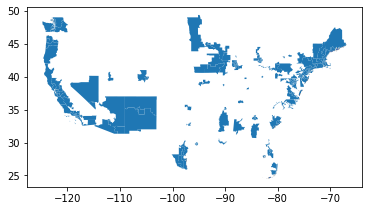

In [ ]:
dem = gpd.read_file("/content/US_House_Elections_Demo_NAD83_dem.shp")
dem.plot();

In [ ]:
#Creating separate shp files for rep districts
df[df['party'] == 'REPUBLICAN'].to_file('US_House_Elections_Demo_NAD83_rep.shp')

<ipython-input-26-047e5560df30>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df[df['party'] == 'REPUBLICAN'].to_file('US_House_Elections_Demo_NAD83_rep.shp')


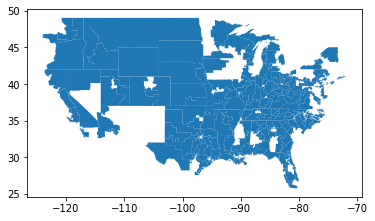

In [ ]:
rep = gpd.read_file("/content/US_House_Elections_Demo_NAD83_rep.shp")
rep.plot();

In [ ]:
dem.head()

,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,...,state,candidate,party,candidatev,totalvotes,Vote_share,nominate_3,ols_u,slag_u,geometry
0,Maine,023113114001,1,113,114,None,None,None,None,None,...,MAINE,CHELLIE PINGREE,DEMOCRAT,201195.0,342053.0,0.588198,0.420,-0.018533,0.013878,"MULTIPOLYGON (((-70.98905 43.79215, -70.98849 ..."
1,Maine,023113114002,2,113,114,None,None,None,None,None,...,MAINE,JARED F GOLDEN,DEMOCRAT,139231.0,281371.0,0.494831,0.114,-0.305061,-0.279719,"MULTIPOLYGON (((-71.08216 45.30631, -71.08169 ..."
2,Maryland,024113114002,2,113,114,None,None,None,None,None,...,MARYLAND,CA DUTCH RUPPERSBERGER,DEMOCRAT,167201.0,253302.0,0.660086,0.295,-0.144330,-0.141670,"MULTIPOLYGON (((-76.87630 39.14132, -76.87622 ..."
3,Maryland,024113114003,3,113,114,None,None,None,None,None,...,MARYLAND,JOHN SARBANES,DEMOCRAT,202407.0,292880.0,0.691092,0.467,0.031148,0.043877,"MULTIPOLYGON (((-77.15622 39.26317, -77.15610 ..."
4,Maryland,024113114004,4,113,114,None,None,None,None,None,...,MARYLAND,ANTHONY G BROWN,DEMOCRAT,209642.0,268583.0,0.780548,0.344,-0.107078,-0.103365,"MULTIPOLYGON (((-77.00816 38.81575, -77.00662 ..."


In [ ]:
dem['nominate_d_abs'] = abs(dem['nominate_d'])
dem.head()

,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,...,candidate,party,candidatev,totalvotes,Vote_share,nominate_3,ols_u,slag_u,geometry,nominate_d_abs
0,Maine,023113114001,1,113,114,None,None,None,None,None,...,CHELLIE PINGREE,DEMOCRAT,201195.0,342053.0,0.588198,0.420,-0.018533,0.013878,"MULTIPOLYGON (((-70.98905 43.79215, -70.98849 ...",0.420
1,Maine,023113114002,2,113,114,None,None,None,None,None,...,JARED F GOLDEN,DEMOCRAT,139231.0,281371.0,0.494831,0.114,-0.305061,-0.279719,"MULTIPOLYGON (((-71.08216 45.30631, -71.08169 ...",0.114
2,Maryland,024113114002,2,113,114,None,None,None,None,None,...,CA DUTCH RUPPERSBERGER,DEMOCRAT,167201.0,253302.0,0.660086,0.295,-0.144330,-0.141670,"MULTIPOLYGON (((-76.87630 39.14132, -76.87622 ...",0.295
3,Maryland,024113114003,3,113,114,None,None,None,None,None,...,JOHN SARBANES,DEMOCRAT,202407.0,292880.0,0.691092,0.467,0.031148,0.043877,"MULTIPOLYGON (((-77.15622 39.26317, -77.15610 ...",0.467
4,Maryland,024113114004,4,113,114,None,None,None,None,None,...,ANTHONY G BROWN,DEMOCRAT,209642.0,268583.0,0.780548,0.344,-0.107078,-0.103365,"MULTIPOLYGON (((-77.00816 38.81575, -77.00662 ...",0.344


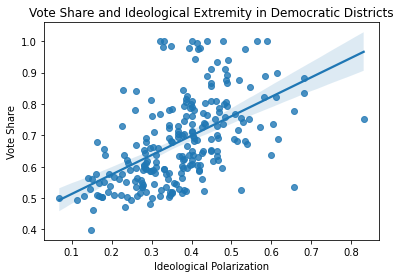

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

d = sns.regplot(x="nominate_d_abs",
            y="Vote_share", 
            data=dem,
           fit_reg = True)

# Add x-axis and y-axis labels
d.set(title="Vote Share and Ideological Extremity in Democratic Districts",
      xlabel="Ideological Polarization",
      ylabel="Vote Share");

In [ ]:
rep['nominate_d_abs'] = abs(rep['nominate_d'])
rep.head()

[Text(0, 0.5, 'Vote Share'),
 Text(0.5, 0, 'Ideological Polarization'),
 Text(0.5, 1.0, 'Vote Share and Ideological Extremity in Republican Districts')]

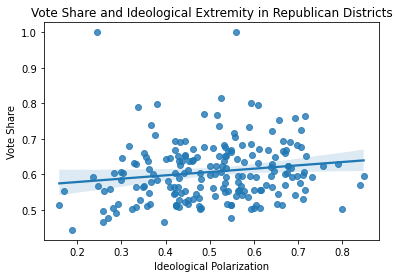

In [ ]:
r = sns.regplot(x="nominate_d_abs",
            y="Vote_share", 
            data=rep,
           fit_reg = True)

# Add x-axis and y-axis labels
r.set(title="Vote Share and Ideological Extremity in Republican Districts",
      xlabel="Ideological Polarization",
      ylabel="Vote Share")

# **Weights matrices for Dem DF**

In [ ]:
#Creating a Kernel Density weights Matrix for rep districts
import libpysal
import esda
w_rep = libpysal.weights.distance.KNN.from_dataframe(rep, k=3)
mi_rep = esda.Moran(rep['nominate_d'], w_rep)
print(mi_rep.I)
mi_rep.p_sim

0.22435202342980082


0.001

In [ ]:
#Creating a Kernel Density weights Matrix for dem districts
import libpysal
import esda
w_dem = libpysal.weights.distance.KNN.from_dataframe(dem, k=3)
mi_dem = esda.Moran(dem['nominate_d'], w_dem)
print(mi_dem.I)
mi_dem.p_sim

0.12999642194921274


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  warnings.warn(message)


0.002

In [ ]:
w_dem.neighbors[1]

[0, 36, 37]

## **OLS Regression (Dem)**

Our first step is to perform a traditional ordinary least squares model. Using DW-nominate scores against vote share and eduction, immigration, and poverty rate.

descriptions of variables:

nominate_d: estimated ideological polarization of 116th house member based on legislative record.

Vote_share: Share of vote collected by winning house candidate. Used as a proxy for degree of district sorting.

p.pop.fore: percentage of total district population that is foreign-born.

poverty.ra: poverty rate in house district. 




In [ ]:
target='nominate_d'
features=['Vote_share', 'p.pop.fore', 'poverty.ra']

Y_dem = dem[target].values.reshape(len(dem),1) #add dimension for spreg OLS DV
X_dem = dem[features].values

In [ ]:
Y_dem.shape,dem[target].shape # see new dimensions of Y

((233, 1), (233,))

In [ ]:
#Running spatial regression on only Dem seats
import spreg

ols_dem=spreg.OLS(Y_dem, X_dem, w=w_dem, \
                          name_y="Legislative Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance",\
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests 
                          moran=True)  # compute Moran’s I on the residuals

print(ols_dem.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Legislative Polarization                Number of Observations:         233
Mean dependent var  :     -0.3707                Number of Variables   :           4
S.D. dependent var  :      0.1205                Degrees of Freedom    :         229
R-squared           :      0.3081
Adjusted R-squared  :      0.2991
Sum squared residual:       2.329                F-statistic           :     33.9938
Sigma-square        :       0.010                Prob(F-statistic)     :   3.277e-18
S.E. of regression  :       0.101                Log likelihood        :     205.944
Sigma-square ML     :       0.010                Akaike info criterion :    -403.888
S.E of regression ML:      0.1000                Schwarz criterion     :    -390.083

--------------------------------------------------------------

# **Spatial Lag Model (Dem)**

In [ ]:
#Even though the presence of spatial lag is unlikely from the diagnostic test, to fully rule out the possibility of spatial lag, I ran a spatial lag model
slag_dem = spreg.ML_Lag(Y_dem, X_dem, w=w_dem,  name_y="Legislative Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance")
print(slag_dem.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Legislative Polarization                Number of Observations:         233
Mean dependent var  :     -0.3707                Number of Variables   :           5
S.D. dependent var  :      0.1205                Degrees of Freedom    :         228
Pseudo R-squared    :      0.3091
Spatial Pseudo R-squared:  0.3078
Sigma-square ML     :       0.010                Log likelihood        :     206.069
S.E of regression   :       0.100                Akaike info criterion :    -402.137
                                                 Schwarz criterion     :    -384.882

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


# **Comparing Residuals (Dem)**

In [ ]:
dem['ols_u'] = ols_dem.u
dem['slag_u'] = slag_dem.u

/usr/local/lib/python3.8/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


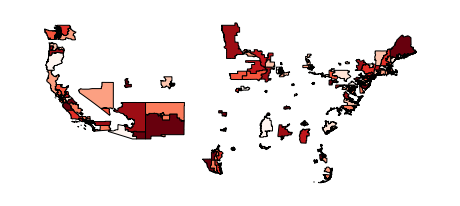

In [ ]:
import mapclassify
import geoplot as gplt
import geoplot.crs as gcrs

ols_dem_resids = mapclassify.Quantiles(dem['ols_u'], k=10)

ax0 = gplt.choropleth(
    dem, hue='ols_u',
    scheme=ols_dem_resids, cmap='Reds');

/usr/local/lib/python3.8/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


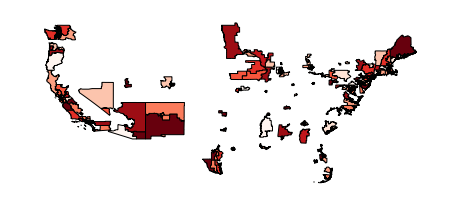

In [ ]:
slag_dem_resids = mapclassify.Quantiles(dem['slag_u'], k=10)

ax0 = gplt.choropleth(
    dem, hue='slag_u',
    scheme=slag_dem_resids, cmap='Reds');

In [ ]:
# Because it is difficult to see visually, comparing Moran's I statistic can be more clear 
import esda
esda.Moran(dem['ols_u'], w_dem).p_sim

0.259

In [ ]:
esda.Moran(dem['slag_u'], w_dem).p_sim

0.384

## **OLS Regression (Rep)**

Our next step is to perform the same model, but on Republican house districts.

descriptions of variables:

nominate_d: estimated ideological polarization of 116th house member based on legislative record.

Vote_share: Share of vote collected by winning house candidate. Used as a proxy for degree of district sorting.

p.pop.fore: percentage of total district population that is foreign-born.

poverty.ra: poverty rate in house district. 

In [ ]:
target='nominate_d'
features=['Vote_share', 'p.pop.fore', 'poverty.ra']

Y_rep = rep[target].values.reshape(len(rep),1) #add dimension for spreg OLS DV
X_rep = rep[features].values

In [ ]:
Y_rep.shape,rep[target].shape # see new dimensions of Y

((198, 1), (198,))

In [ ]:
#Running spatial regression on only Dem seats
import spreg

ols_rep=spreg.OLS(Y_rep, X_rep, w=w_rep, \
                          name_y="Legislative Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance",\
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests 
                          moran=True)  # compute Moran’s I on the residuals

print(ols_rep.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Legislative Polarization                Number of Observations:         198
Mean dependent var  :      0.5065                Number of Variables   :           4
S.D. dependent var  :      0.1396                Degrees of Freedom    :         194
R-squared           :      0.0247
Adjusted R-squared  :      0.0097
Sum squared residual:       3.743                F-statistic           :      1.6403
Sigma-square        :       0.019                Prob(F-statistic)     :      0.1814
S.E. of regression  :       0.139                Log likelihood        :     111.932
Sigma-square ML     :       0.019                Akaike info criterion :    -215.863
S.E of regression ML:      0.1375                Schwarz criterion     :    -202.710

--------------------------------------------------------------

# **Spatial Lag Model (Rep)**

In [ ]:
#Spatial Lag was found to be significant
slag_rep = spreg.ML_Lag(Y_rep, X_rep, w=w_rep,  name_y="Legislative Polarization", name_x=['vote share', 'foreign population', 'poverty rate'], name_w="kernel distance")
print(slag_rep.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :kernel distance
Dependent Variable  :Legislative Polarization                Number of Observations:         198
Mean dependent var  :      0.5065                Number of Variables   :           5
S.D. dependent var  :      0.1396                Degrees of Freedom    :         193
Pseudo R-squared    :      0.1171
Spatial Pseudo R-squared:  0.0216
Sigma-square ML     :       0.017                Log likelihood        :     118.542
S.E of regression   :       0.131                Akaike info criterion :    -227.084
                                                 Schwarz criterion     :    -210.642

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


# **Comparing Residuals (Rep)**

In [ ]:
rep['ols_u'] = ols_rep.u
rep['slag_u'] = slag_rep.u

/usr/local/lib/python3.8/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


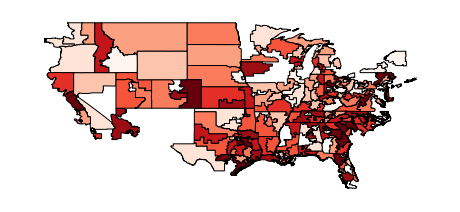

In [ ]:
import mapclassify
import geoplot as gplt
import geoplot.crs as gcrs

ols_rep_resids = mapclassify.Quantiles(rep['ols_u'], k=10)

ax0 = gplt.choropleth(
    rep, hue='ols_u',
    scheme=ols_rep_resids, cmap='Reds');

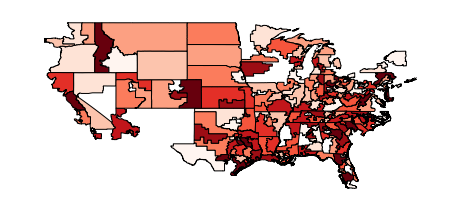

In [ ]:
slag_rep_resids = mapclassify.Quantiles(rep['slag_u'], k=10)

ax0 = gplt.choropleth(
    rep, hue='slag_u',
    scheme=slag_rep_resids, cmap='Reds');

In [ ]:
# Because it is difficult to see visually, comparing Moran's I statistic can be more clear 
import esda
esda.Moran(rep['ols_u'], w_rep).p_sim

0.001

In [ ]:
esda.Moran(rep['slag_u'], w_rep).p_sim

0.455